28263 collected… in readFastFile()  ./hg19/chr1.fa
0 collected… in readFastFile()  ./hg19/chr2.fa
0 collected… in readFastFile()  ./hg19/chr3.fa
0 collected… in readFastFile()  ./hg19/chr4.fa
0 collected… in readFastFile()  ./hg19/chr5.fa
0 collected… in readFastFile()  ./hg19/chr6.fa
0 collected… in readFastFile()  ./hg19/chr7.fa
0 collected… in readFastFile()  ./hg19/chr8.fa
0 collected… in readFastFile()  ./hg19/chr9.fa
0 collected… in readFastFile()  ./hg19/chr10.fa
0 collected… in readFastFile()  ./hg19/chr11.fa
0 collected… in readFastFile()  ./hg19/chr12.fa
0 collected… in readFastFile()  ./hg19/chr13.fa
0 collected… in readFastFile()  ./hg19/chr14.fa
0 collected… in readFastFile()  ./hg19/chr15.fa
0 collected… in readFastFile()  ./hg19/chr16.fa
0 collected… in readFastFile()  ./hg19/chr17.fa
0 collected… in readFastFile()  ./hg19/chr18.fa
0 collected… in readFastFile()  ./hg19/chr19.fa
0 collected… in readFastFile()  ./hg19/chr20.fa
0 collected… in readFastFile()  ./hg19/chr21.

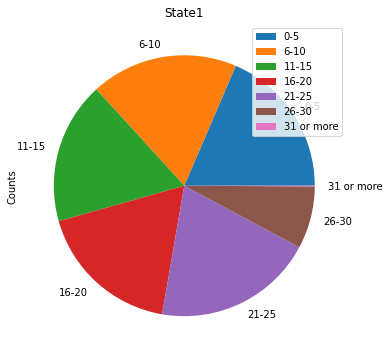

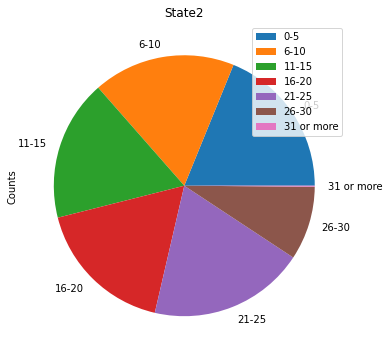

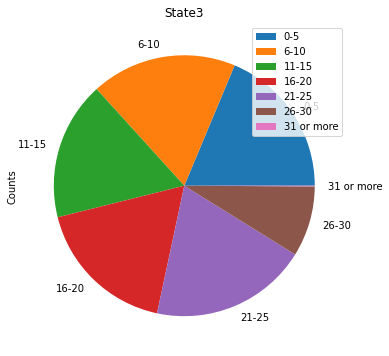

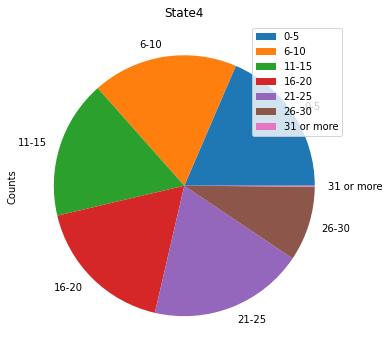

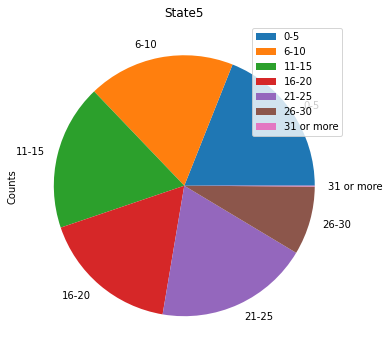

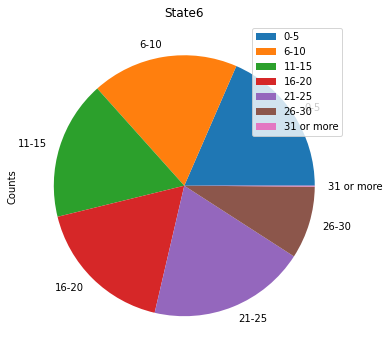

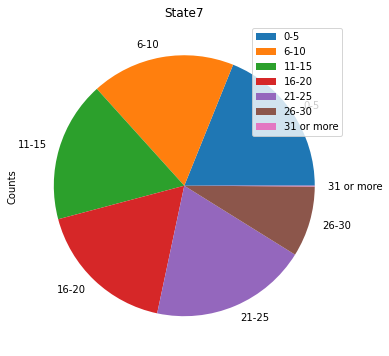

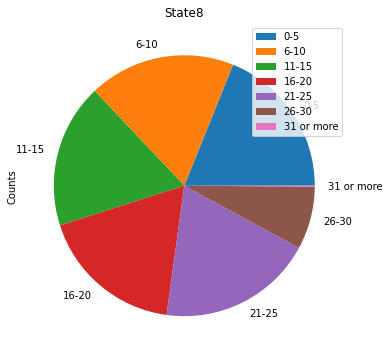

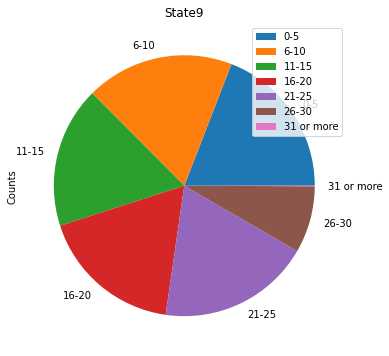

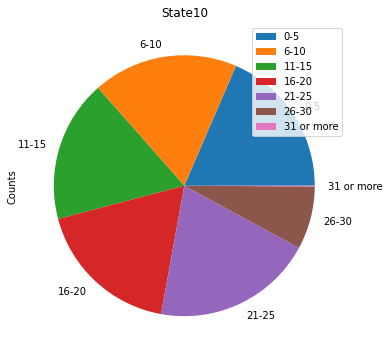

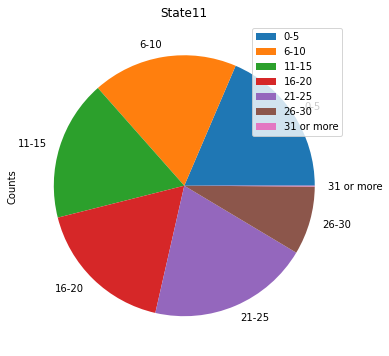

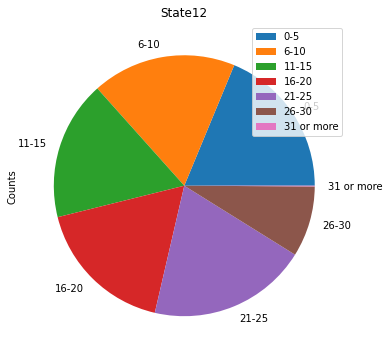

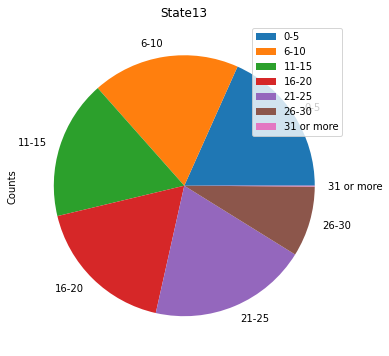

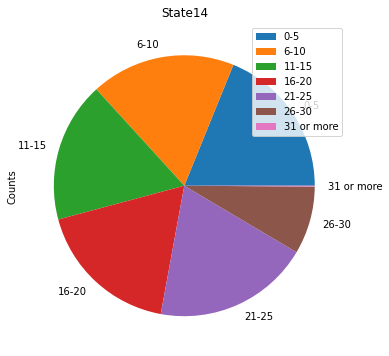

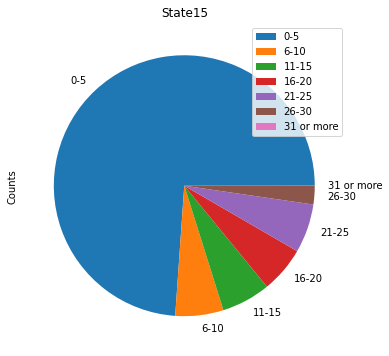

In [17]:

import re
import gc
import sequiturG as sequitur
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc



def deleteWhiteSpacefromFasta(file1):
	file1 = re.sub(r'^.{5}', '', file1.read().lower()) #ignore the title
	file2 = re.sub(r'[^natcg]', '', file1) #delete unwanted chars
	return file2

def readFastaFile(fileName):
    fastaFile = open(fileName, 'r') # chrx.fa file extension here  #~250 MB
    fastaString = deleteWhiteSpacefromFasta(fastaFile)
    fastaFile.close()
    memoryCollected = gc.collect()
    print (memoryCollected, "collected… in readFastFile() ", fileName)
    return fastaString

sequitur.reset_numRules()

#get the data

chrFileName = ['', "chr1.fa", "chr2.fa", "chr3.fa", "chr4.fa", "chr5.fa", "chr6.fa", "chr7.fa","chr8.fa", "chr9.fa", "chr10.fa", "chr11.fa", "chr12.fa", "chr13.fa", "chr14.fa", "chr15.fa", "chr16.fa","chr17.fa", "chr18.fa", "chr19.fa", "chr20.fa", "chr21.fa", "chr22.fa", "chrX.fa", "chrY.fa" ]
fastaString = ['']
for i in range(1,len(chrFileName)):
    fastaString.append(readFastaFile('./hg19/' + chrFileName[i]))
for i in range(1,16):
    trainBEDFileName = "../snpX200bp15states/All_200bp_DominantSub_TwoStates_"+str(i)+"_v5.bed"
    bedFile= open(trainBEDFileName,'r')
    bedFile.seek(0)
    data_frame = pd.DataFrame(np.random.rand(7, 1),
                            index=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30','31 or more'],
                            columns=pd.Index(['Counts'], name='Counts'))

#reset the number of rules    
    
    data_frame.loc['0-5']= 0
    data_frame.loc['6-10']= 0
    data_frame.loc['11-15']= 0
    data_frame.loc['16-20']= 0
    data_frame.loc['21-25']= 0
    data_frame.loc['26-30']= 0
    data_frame.loc['31 or more']= 0
    
#    fig = plt.figure(figsize=(15, 150))
#    ax = fig.add_subplot(15,1,i)
    
    while True:
            line = bedFile.readline()
            if not line:
                    break
            tokens = line.strip().split('\t')

#counting the number of rules 
            
            if int(tokens[3]) == 1:  
                    chrom = int(tokens[0])
                    start = int(tokens[1])
                    end = int(tokens[2])
                    dnaseq = fastaString[chrom][start:end]
                    
#get the number of rule count by running sequitur

                    rules = sequitur.run_sequitur(dnaseq)
                    ruleCount = sequitur.get_ruleCount()
                    if ruleCount>30: 
                        data_frame.loc['31 or more']+=1
                    elif ruleCount>25:
                        data_frame.loc['26-30']+=1
                    elif ruleCount>20:
                        data_frame.loc['21-25']+=1
                    elif ruleCount>15:
                        data_frame.loc['16-20']+=1
                    elif ruleCount>10:
                        data_frame.loc['11-15']+=1
                    elif ruleCount>5:
                        data_frame.loc['6-10']+=1
                    else:
                        data_frame.loc['0-5']+=1
                        
#draw pie graphs
    
    data_frame.plot.pie(y='Counts', figsize=(11, 6), title='State'+str(i))
#plt.show()

  
    


